In [112]:
# importing depedencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import hvplot.pandas
import geopandas as gpd
import json
import folium
from pprint import pprint

### import data

In [113]:
# Water Monitoring Sites
with open("resources/water_sites.json", "r") as f:
    water_data = json.load(f)
    wdf = gpd.GeoDataFrame.from_features(water_data)
    

In [114]:
# Water Sample Variable Descriptions
water_variable_info_df = pd.read_csv("resources/water_variable_info.csv")   

In [115]:
# Water Samples by Monitoring Site ID
#water_data_df=pd.read_csv('resources/water_data.csv')

In [116]:
# Forest Fire Polygon Shape data
with open("resources/fire_data.json", "r") as f:
    firedata = json.load(f)
    fdf = gpd.GeoDataFrame.from_features(firedata)
    print(fdf.head())

                                            geometry SRC_AGENCY      FIRE_ID  \
0  POLYGON Z ((-115.75479 49.79610 0.00000, -115....         BC  2016-N10037   
1  MULTIPOLYGON Z (((-114.97290 49.01062 0.00000,...         BC  2016-N10016   
2  POLYGON Z ((-114.94281 50.10509 0.00000, -114....         BC  2016-N10009   
3  POLYGON Z ((-115.72874 49.63289 0.00000, -115....         BC  2016-N10004   
4  POLYGON Z ((-115.75699 49.67369 0.00000, -115....         BC  2016-N10002   

  FIRENAME  YEAR  MONTH  DAY    REP_DATE DATE_TYPE OUT_DATE  ... WATER_REM  \
0     None  2016      5   13  2016-05-13      None     None  ...      None   
1     None  2016      4   20  2016-04-20      None     None  ...      None   
2     None  2016      4   13  2016-04-13      None     None  ...      None   
3     None  2016      4    5  2016-04-05      None     None  ...      None   
4     None  2016      4    2  2016-04-02      None     None  ...      None   

   UNBURN_REM  MORE_INFO   POLY_DATE      CFS_REF_

In [117]:
# Water Drainage Watersheds Polygon Data
with open("resources/water_drainage_regions.json", "r") as f:
    water_drainage_region = json.load(f)
    wdrdf = gpd.GeoDataFrame.from_features(water_drainage_region)

In [118]:
# Forest Fire Point Data
fire_point_data_df =  pd.read_csv('resources/fire_point_data.txt')
fire_point_data_gdf = gpd.GeoDataFrame(fire_point_data_df, geometry=gpd.points_from_xy(fire_point_data_df.LONGITUDE, fire_point_data_df.LATITUDE), crs='EPSG:4617')

### plot data

<Axes: >

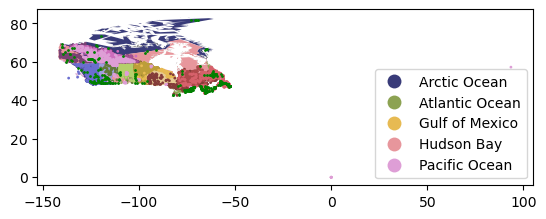

<Figure size 1600x800 with 0 Axes>

In [119]:
fig, ax = plt.subplots(1)
plt.figure(figsize =(16,8))
wdrdf.plot(ax=ax, cmap ='tab20b', column='ODA_Name', legend=True)
fire_point_data_gdf.plot(ax=ax, cmap ='tab20b', markersize=1, legend=True)
wdf.plot(ax=ax, color='green', markersize=1, legend=True )
# ax.legend(loc='upper right')

### The intersection with the fire data takes ~ 5 - 10 minutes I will move it to a data prep step

In [120]:
#intersecting watershed and fire data to select ONLY fire data occuring in the Atlatic Ocean Watershed
myMainPlot_gdf = wdrdf.loc[wdrdf['ODA_Name']=='Atlantic Ocean'].overlay(fire_point_data_gdf, how='intersection')



c:\Users\ajmohile\anaconda3\envs\dev\Lib\site-packages\geopandas\geodataframe.py:2467: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4617

  return geopandas.overlay(
c:\Users\ajmohile\anaconda3\envs\dev\Lib\site-packages\geopandas\geodataframe.py:2467: UserWarning: `keep_geom_type=True` in overlay resulted in 1273 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  return geopandas.overlay(


In [121]:
wdrdf.head()

,geometry,DR_Code,Code_RD,DR_Name,Nom_RD,ODA_Code,Code_ADO,ODA_Name,Nom_ADO
0,"MULTIPOLYGON (((-123.54272 48.31717, -123.5377...",01,01,Pacific Coastal,Côte du Pacifique,1,1,Pacific Ocean,Océan Pacifique
1,"MULTIPOLYGON (((-122.89017 49.08787, -122.8931...",02,02,FraserLower Mainland,FraserBasses-terres,1,1,Pacific Ocean,Océan Pacifique
2,"POLYGON ((-119.27487 50.62710, -118.79584 50.0...",03,03,OkanaganSimilkameen,OkanaganSimilkameen,1,1,Pacific Ocean,Océan Pacifique
3,"POLYGON ((-119.68536 52.78335, -118.92132 52.8...",04,04,Columbia,Columbia,1,1,Pacific Ocean,Océan Pacifique
4,"POLYGON ((-140.75267 68.64061, -136.16989 67.5...",05,05,Yukon,Yukon,1,1,Pacific Ocean,Océan Pacifique


In [122]:
fire_point_data_gdf.head()

,FID,SRC_AGENCY,FIRE_ID,FIRENAME,LATITUDE,LONGITUDE,YEAR,MONTH,DAY,REP_DATE,...,CFS_REF_ID,CFS_NOTE1,CFS_NOTE2,ACQ_DATE,SRC_AGY2,ECOZONE,ECOZ_REF,ECOZ_NAME,ECOZ_NOM,geometry
0,0,BC,1950-G00026,,59.876,-131.922,1950,6,4,1950-06-04 00:00:00,...,BC-1950-1950-G00026,,,2020-05-05 00:00:00,BC,12,12,Boreal Cordillera,CordillCre boreale,POINT (-131.92200 59.87600)
1,1,BC,1951-R00097,,59.760,-132.808,1951,7,15,1951-07-15 00:00:00,...,BC-1951-1951-R00097,,,2020-05-05 00:00:00,BC,12,12,Boreal Cordillera,CordillCre boreale,POINT (-132.80800 59.76000)
2,2,BC,1950-G00035,,57.463,-122.816,1950,6,14,1950-06-14 00:00:00,...,BC-1950-1950-G00035,,,2020-05-05 00:00:00,BC,4,4,Taiga Plain,Taiga des plaines,POINT (-122.81600 57.46300)
3,3,BC,1953-G00043,,57.684,-121.925,1953,5,1,1953-05-01 00:00:00,...,BC-1953-1953-G00043,,,2020-05-05 00:00:00,BC,4,4,Taiga Plain,Taiga des plaines,POINT (-121.92500 57.68400)
4,4,BC,1950-R00029,,59.318,-133.228,1950,6,22,1950-06-22 00:00:00,...,BC-1950-1950-R00029,,,2020-05-05 00:00:00,BC,12,12,Boreal Cordillera,CordillCre boreale,POINT (-133.22800 59.31800)


In [123]:
myMainPlot_gdf.head()

,DR_Code,Code_RD,DR_Name,Nom_RD,ODA_Code,Code_ADO,ODA_Name,Nom_ADO,FID,SRC_AGENCY,...,CFS_REF_ID,CFS_NOTE1,CFS_NOTE2,ACQ_DATE,SRC_AGY2,ECOZONE,ECOZ_REF,ECOZ_NAME,ECOZ_NOM,geometry


In [125]:
#For a = wdrdf
#b = fire_point_data_gdf
#a_converted = a.to_crs(b.crs)

In [126]:
#limiting the selected drainage region to the Atlantic Region and renaming the colum for DR_Name
myRegion_gdf= wdrdf.loc[wdrdf['ODA_Name']=='Atlantic Ocean'][['DR_Name', 'geometry']]
myRegion_gdf = myRegion_gdf.rename(columns={'DR_Name': 'Drainage Basin'})

In [128]:
myMap  = myRegion_gdf.explore(column='Drainage Basin', cmap = 'Accent', tiles='CartoDB positron', tooltip=False)

folium.GeoJson(myMainPlot_gdf, name = "Forest Fires", overlay = True, style_function=lambda feature:{'fillColor':'red', 'opacity':.75, 'color':'red'}).add_to(myMap)
folium.GeoJson(wdf.loc[wdf['OCEANDA']=='ATLANTIC OCEAN'], name ="Montoring Sites", overlay = True, style_function=lambda feature:{'color':'green'}).add_to(myMap)
folium.TileLayer("OpenStreetMap").add_to(myMap)
folium.TileLayer("CartoDB positron").add_to(myMap)
folium.LayerControl().add_to(myMap)

myMap

ValueError: Cannot transform naive geometries.  Please set a crs on the object first.